In [2]:
import pandas as pd
import numpy as np

cols = ['description', 'variety', 'year', 'country', 'location', 'points']
df = pd.read_parquet('data/wine/wine_review.parquet.gzip', columns=cols)
print(df.shape)
df.head()

(100538, 6)


,description,variety,year,country,location,points
0,"Aromas include tropical fruit, broom, brimston...",White Blend,2013,Italy,Etna,87
1,"This is ripe and fruity, a wine that is smooth...",Portuguese Red,2011,Portugal,Douro,87
2,"Tart and snappy, the flavors of lime flesh and...",Pinot Gris,2013,US,Oregon,87
3,"Pineapple rind, lemon pith and orange blossom ...",Riesling,2013,US,Michigan,87
4,"Much like the regular bottling from 2012, this...",Pinot Noir,2012,US,Oregon,87


In [3]:
df.groupby('description').count()[['points']].query('points > 1')

,points
description,
"90–92. Barrel sample. This is a solid and dense wine with hints of bitter chocolate along with super-ripe blackberry fruits. The wine has concentration, richness and a fine ageing potential.",2
"92–94. Barrel sample. With so much spicy fruit, intensely ripe blackberry flavors and solid tannins, all the elements of excellence are here, and powered by a firm structure. This wine has weight and a fine Cabernet concentration.",2
"Almost too much of a good thing, Passo is a thick, jammy and modern blend of traditional Italian grapes and international varieties such as Cabernet Sauvignon and Merlot. This is a bold, big wine with a thick, chewy mouthfeel that should be paired with aged cheese or succulent meat.",2
"Aromas of scorched soil, toasted hazelnut, dried black cherry and an earthy whiff of game carry over to the palate along with a note of bitter sage. Firm tannins provide support.",2
"Aromas of weedy underbrush, toast, menthol and cherry marinated in spirits emerge in the glass. The palate shows raw sour cherry and a hint of licorice alongside raspy tannins that dry out the finish.",2
"Cigar box, café au lait, and dried tobacco aromas are followed by coffee and cherry flavors, with barrel spices lingering on the finish. The wood gets a bit out front but it still delivers enjoyment.",2
"Classically structured, this still needs to open up but already offers aromas of dark berry, menthol, toast, dried herbs and a whiff of cocoa. The firm palate delivers red cherry, raspberry, mocha, tobacco and licorice accompanied by bracing tannins and fresh acidity.",2
"Dark berry, toasted hazelnut and menthol aromas lift out of the glass. The tightly wound palate is still rather closed and on the lean side in terms of fruit richness, but slowly reveals sour cherry, licorice and a note of ground pepper. A tannic backbone provides structure.",2
"Hugely delicious, just a joy to drink. So soft and velvety, so rich in blackberry jam, cassis and chocolate flavors, with the tannins so smooth and round. Really wonderful over the next few years, although the softness and high alcohol suggest it's not an ager.",2


In [4]:
dp = df[~df.duplicated('description', keep=False)]
dp

,description,variety,year,country,location,points
0,"Aromas include tropical fruit, broom, brimston...",White Blend,2013,Italy,Etna,87
1,"This is ripe and fruity, a wine that is smooth...",Portuguese Red,2011,Portugal,Douro,87
2,"Tart and snappy, the flavors of lime flesh and...",Pinot Gris,2013,US,Oregon,87
3,"Pineapple rind, lemon pith and orange blossom ...",Riesling,2013,US,Michigan,87
4,"Much like the regular bottling from 2012, this...",Pinot Noir,2012,US,Oregon,87
...,...,...,...,...,...,...
129966,Notes of honeysuckle and cantaloupe sweeten th...,Riesling,2013,Germany,Mosel,90
129967,Citation is given as much as a decade of bottl...,Pinot Noir,2004,US,Oregon,90
129968,Well-drained gravel soil gives this wine its c...,Gewürztraminer,2013,France,Alsace,90
129969,"A dry style of Pinot Gris, this is crisp with ...",Pinot Gris,2012,France,Alsace,90


In [5]:
points_range = lambda from_, to_: np.linspace(from_, to_, to_-from_+1)

In [6]:
m = {points: 'acceptable' for points in points_range(80, 82)}
m.update({points: 'good' for points in points_range(83, 86)})
m.update({points: 'very good' for points in points_range(87, 89)})
m.update({points: 'excellent' for points in points_range(90, 93)})
m.update({points: 'superb' for points in points_range(94, 97)})
m.update({points: 'classic' for points in points_range(98, 100)})
m

{80.0: 'acceptable',
 81.0: 'acceptable',
 82.0: 'acceptable',
 83.0: 'good',
 84.0: 'good',
 85.0: 'good',
 86.0: 'good',
 87.0: 'very good',
 88.0: 'very good',
 89.0: 'very good',
 90.0: 'excellent',
 91.0: 'excellent',
 92.0: 'excellent',
 93.0: 'excellent',
 94.0: 'superb',
 95.0: 'superb',
 96.0: 'superb',
 97.0: 'superb',
 98.0: 'classic',
 99.0: 'classic',
 100.0: 'classic'}

In [7]:
dp.points.map(m)

0         very good
1         very good
2         very good
3         very good
4         very good
            ...    
129966    excellent
129967    excellent
129968    excellent
129969    excellent
129970    excellent
Name: points, Length: 100496, dtype: object

In [8]:
dp['simplified'] = dp.points.map(m)
dp['description_len'] = dp.description.str.len()
dp.head()

/var/folders/y8/_pw0hcc137n3wqx4y4cz33100000gq/T/ipykernel_52712/4006137760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp['simplified'] = dp.points.map(m)
/var/folders/y8/_pw0hcc137n3wqx4y4cz33100000gq/T/ipykernel_52712/4006137760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp['description_len'] = dp.description.str.len()


,description,variety,year,country,location,points,simplified,description_len
0,"Aromas include tropical fruit, broom, brimston...",White Blend,2013,Italy,Etna,87,very good,172
1,"This is ripe and fruity, a wine that is smooth...",Portuguese Red,2011,Portugal,Douro,87,very good,227
2,"Tart and snappy, the flavors of lime flesh and...",Pinot Gris,2013,US,Oregon,87,very good,186
3,"Pineapple rind, lemon pith and orange blossom ...",Riesling,2013,US,Michigan,87,very good,199
4,"Much like the regular bottling from 2012, this...",Pinot Noir,2012,US,Oregon,87,very good,249


<Axes: xlabel='simplified', ylabel='description_len'>

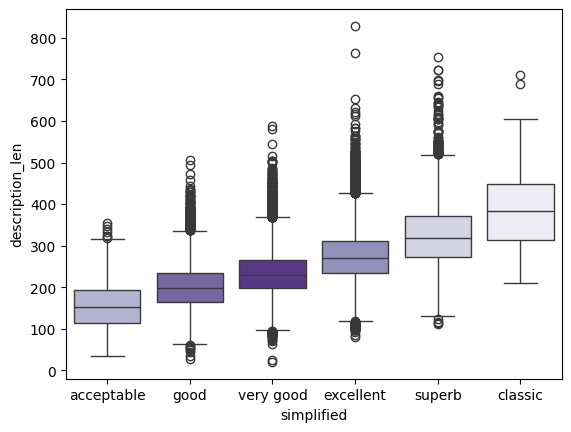

In [9]:
import seaborn as sns
sns.boxplot(dp, x='simplified', y='description_len', order=['acceptable', 'good', 'very good', 'excellent', 'superb', 'classic'], hue='simplified', palette='Purples_r')

In [10]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

**Bag of Word**

In [11]:
X = dp.description
y = dp.simplified

vectorizer = CountVectorizer()
vectorizer.fit(X)

CountVectorizer()

In [12]:
X = vectorizer.transform(X)
print(X.shape, X.nnz)
print(f'{X.nnz/(X.shape[0]*X.shape[1]):0.2%}')

(100496, 28677) 3470903
0.12%


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.1)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

  acceptable       0.90      0.08      0.14       242
     classic       0.00      0.00      0.00        18
   excellent       0.62      0.76      0.68      3418
        good       0.65      0.65      0.65      2468
      superb       1.00      0.00      0.01       529
   very good       0.55      0.55      0.55      3375

    accuracy                           0.60     10050
   macro avg       0.62      0.34      0.34     10050
weighted avg       0.63      0.60      0.58     10050



/Users/patrick/Documents/personal/ucb/oenologist/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/patrick/Documents/personal/ucb/oenologist/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/patrick/Documents/personal/ucb/oenologist/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

**TF-IFD**

In [14]:
X = dp.description
y = dp.simplified

vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.1)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

  acceptable       0.93      0.06      0.11       231
     classic       0.00      0.00      0.00        10
   excellent       0.60      0.77      0.68      3502
        good       0.64      0.56      0.60      2404
      superb       0.00      0.00      0.00       540
   very good       0.52      0.53      0.53      3363

    accuracy                           0.58     10050
   macro avg       0.45      0.32      0.32     10050
weighted avg       0.56      0.58      0.56     10050



/Users/patrick/Documents/personal/ucb/oenologist/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/patrick/Documents/personal/ucb/oenologist/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/patrick/Documents/personal/ucb/oenologist/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

**Embeddings**

In [16]:
X = pd.read_parquet('data/wine/mpnet_embeddings.parquet.gzip').loc[dp.index]
y = dp.simplified

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.1)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

  acceptable       1.00      0.01      0.02       250
     classic       0.00      0.00      0.00        13
   excellent       0.54      0.70      0.61      3515
        good       0.56      0.46      0.50      2349
      superb       1.00      0.00      0.00       568
   very good       0.46      0.49      0.48      3355

    accuracy                           0.52     10050
   macro avg       0.59      0.28      0.27     10050
weighted avg       0.55      0.52      0.49     10050



/Users/patrick/Documents/personal/ucb/oenologist/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/patrick/Documents/personal/ucb/oenologist/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/patrick/Documents/personal/ucb/oenologist/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

<Axes: >

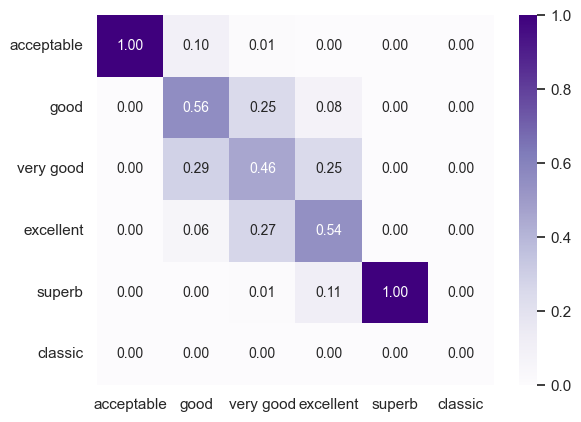

In [18]:
labels = ['acceptable', 'good', 'very good', 'excellent', 'superb', 'classic']
conf_m = confusion_matrix(y_test, predictions, normalize='pred', labels=labels)
sns.set_theme(font_scale=1)
sns.heatmap(conf_m, xticklabels=labels, yticklabels=labels, annot=True, cmap='Purples', fmt='.2f', annot_kws={'size': 10})

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline

pipe = Pipeline([('pre', ColumnTransformer([('num', StandardScaler(), ['year']),
                                            ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), ['country', 'variety', 'location'])
                                           ], remainder='passthrough')),
                 ('fit', RandomForestClassifier())])
pipe

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['year']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['country', 'variety',
                                                   'location'])])),
                ('fit', RandomForestClassifier())])

In [23]:
X, y = pd.concat([dp[['variety', 'year', 'country', 'location']], pd.read_parquet('data/wine/mpnet_embeddings.parquet.gzip').loc[dp.index]], axis=1), dp.simplified
X.columns = X.columns.astype(str)
print(X.shape)
X.head()

(100496, 772)


,variety,year,country,location,0,1,2,3,4,5,...,758,759,760,761,762,763,764,765,766,767
0,White Blend,2013,Italy,Etna,0.036825,0.040504,-0.049127,0.012060,-0.017809,0.045190,...,-0.018225,-0.022451,-0.030674,0.030395,-0.036411,0.075180,-0.021670,0.017032,-0.024503,-0.021728
1,Portuguese Red,2011,Portugal,Douro,0.015400,0.076190,-0.017931,0.004965,-0.076234,0.021419,...,-0.071278,0.033845,-0.002066,0.018129,-0.004691,0.028105,-0.042770,0.010317,0.063025,-0.026926
2,Pinot Gris,2013,US,Oregon,0.032447,0.012291,-0.034564,-0.020621,-0.048290,0.031377,...,-0.126703,0.035472,0.029064,0.006745,-0.012355,0.030802,-0.012589,0.024286,0.023172,-0.017200
3,Riesling,2013,US,Michigan,0.076041,0.044183,-0.017158,-0.041186,-0.030582,0.051051,...,-0.063876,-0.010313,0.004829,0.009389,-0.011263,0.035524,-0.014419,0.030267,-0.036529,-0.043187
4,Pinot Noir,2012,US,Oregon,0.011352,0.057223,-0.023293,0.022438,-0.078027,0.046609,...,-0.058865,0.031108,0.006709,0.020604,-0.017218,0.023554,-0.039825,0.021364,0.025454,-0.022300


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.1)
pipe.fit(X_train, y_train)

predictions = pipe.predict(X_test)
print(classification_report(y_test, predictions))

/Users/patrick/Documents/personal/ucb/oenologist/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: 'Red Blend'

In [25]:
predictions = pipe.predict(X_test)
print(classification_report(y_test, predictions))

/Users/patrick/Documents/personal/ucb/oenologist/.venv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


              precision    recall  f1-score   support

  acceptable       0.00      0.00      0.00       245
     classic       0.00      0.00      0.00        18
   excellent       0.53      0.71      0.61      3410
        good       0.56      0.44      0.50      2452
      superb       0.50      0.00      0.00       517
   very good       0.45      0.48      0.47      3408

    accuracy                           0.51     10050
   macro avg       0.34      0.27      0.26     10050
weighted avg       0.50      0.51      0.49     10050



/Users/patrick/Documents/personal/ucb/oenologist/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/patrick/Documents/personal/ucb/oenologist/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/patrick/Documents/personal/ucb/oenologist/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

<Axes: >

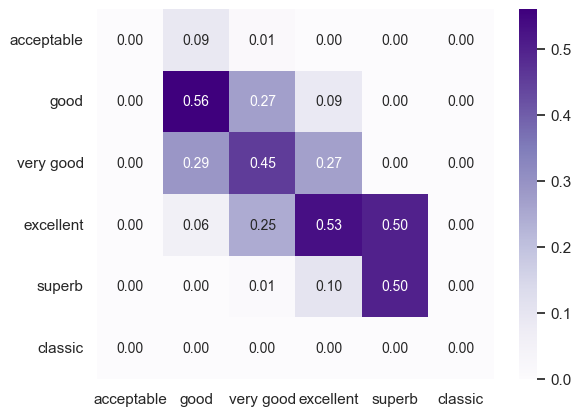

In [26]:
labels = ['acceptable', 'good', 'very good', 'excellent', 'superb', 'classic']
conf_m = confusion_matrix(y_test, predictions, normalize='pred', labels=labels)
sns.set_theme(font_scale=1)
sns.heatmap(conf_m, xticklabels=labels, yticklabels=labels, annot=True, cmap='Purples', fmt='.2f', annot_kws={'size': 10})